In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fl


In [75]:
bike_data_hourly = pd.read_csv('/Users/enzowurtele/Desktop/dataBases/CBS_2021-2023_Hourly_Weather.csv')

In [76]:
bike_data_daily = pd.read_csv('/Users/enzowurtele/Desktop/dataBases/CBS_2021-2023_Daily_Weather.csv')

In [77]:
bike_data_hourly.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [78]:
def humidity_category(humidity):
    if humidity <= 30:
        return 'Very Dry'
    elif 31 <= humidity <= 50:
        return 'Dry'
    elif 51 <= humidity <= 70:
        return 'Moderate'
    elif 71 <= humidity <= 85:
        return 'Humid'
    else:  # humidity > 85
        return 'Very Humid'

bike_data_hourly['humidity_catogorised'] = bike_data_hourly['relativehumidity_2m (%)'].apply(humidity_category)

In [79]:
def temperature_category(temp):
    if temp >= 30:
        return 'Hot'
    elif 20 <= temp < 30:
        return 'Warm'
    elif 10 <= temp < 20:
        return 'Temperate'
    elif 0 <= temp < 10:
        return 'Cool'
    elif -10 <= temp < 0:
        return 'Cold'
    else:  # temp < -10
        return 'Freezing'

bike_data_hourly['temp_catogorised'] = bike_data_hourly['temperature_2m (°C)'].apply(temperature_category)

In [80]:
bike_data_hourly['weathercode (wmo code)'].unique()

array([ 1,  2,  3, 51, 53, 61, 63,  0, 71, 73, 55, 75, 65])

In [81]:
weather = {
0:	'Clear sky',
1:	'Mainly clear',
2:	'Partly cloudy',
3:	'Overcast',
51:	'Light drizzle',
53:	'Moderate drizzle',
55:	'Dense drizzle',
61:	'Slight rain',
63:	'Moderate rain',
65:	'Heavy rain',
71:	'Slight snow fall',
73:	'Moderate snow fall',
75:	'Heavy snow fall'
}

bike_data_hourly['weather_catagorised'] = bike_data_hourly['weathercode (wmo code)'].map(weather)

In [82]:
def wind_feel(speed):
    if speed <= 5:
        return 'Calm'
    elif 6 <= speed <= 28:
        return 'Light to Moderate Breeze'
    elif 29 <= speed <= 61:
        return 'Fresh to Strong Breeze'
    elif 62 <= speed <= 88:
        return 'High Wind to Gale'
    else:  # speed > 88
        return 'Severe Gale to Hurricane'

bike_data_hourly['wind_catagorised'] = bike_data_hourly['windspeed_10m (km/h)'].apply(wind_feel)

In [83]:
bike_data_hourly['Date'] = pd.to_datetime(bike_data_hourly['Date'])

In [84]:
bike_data_hourly.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),humidity_catogorised,temp_catogorised,weather_catagorised,wind_catagorised
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Very Humid,Cool,Mainly clear,Light to Moderate Breeze
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Very Humid,Cool,Mainly clear,Light to Moderate Breeze
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Very Humid,Cool,Partly cloudy,Light to Moderate Breeze
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Humid,Cool,Partly cloudy,Light to Moderate Breeze
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Humid,Cool,Partly cloudy,Light to Moderate Breeze


In [85]:
bike_data_hourly.dtypes

Casual                            float64
Date                       datetime64[ns]
Hour                                int64
Member                            float64
Total_rides                       float64
relativehumidity_2m (%)             int64
temperature_2m (°C)               float64
weathercode (wmo code)              int64
windspeed_10m (km/h)              float64
humidity_catogorised               object
temp_catogorised                   object
weather_catagorised                object
wind_catagorised                   object
dtype: object

[Text(0.5, 0, 'Casual'),
 Text(1.5, 0, 'Date'),
 Text(2.5, 0, 'Hour'),
 Text(3.5, 0, 'Member'),
 Text(4.5, 0, 'Total_rides'),
 Text(5.5, 0, 'relativehumidity_2m (%)'),
 Text(6.5, 0, 'temperature_2m (°C)'),
 Text(7.5, 0, 'weathercode (wmo code)'),
 Text(8.5, 0, 'windspeed_10m (km/h)')]

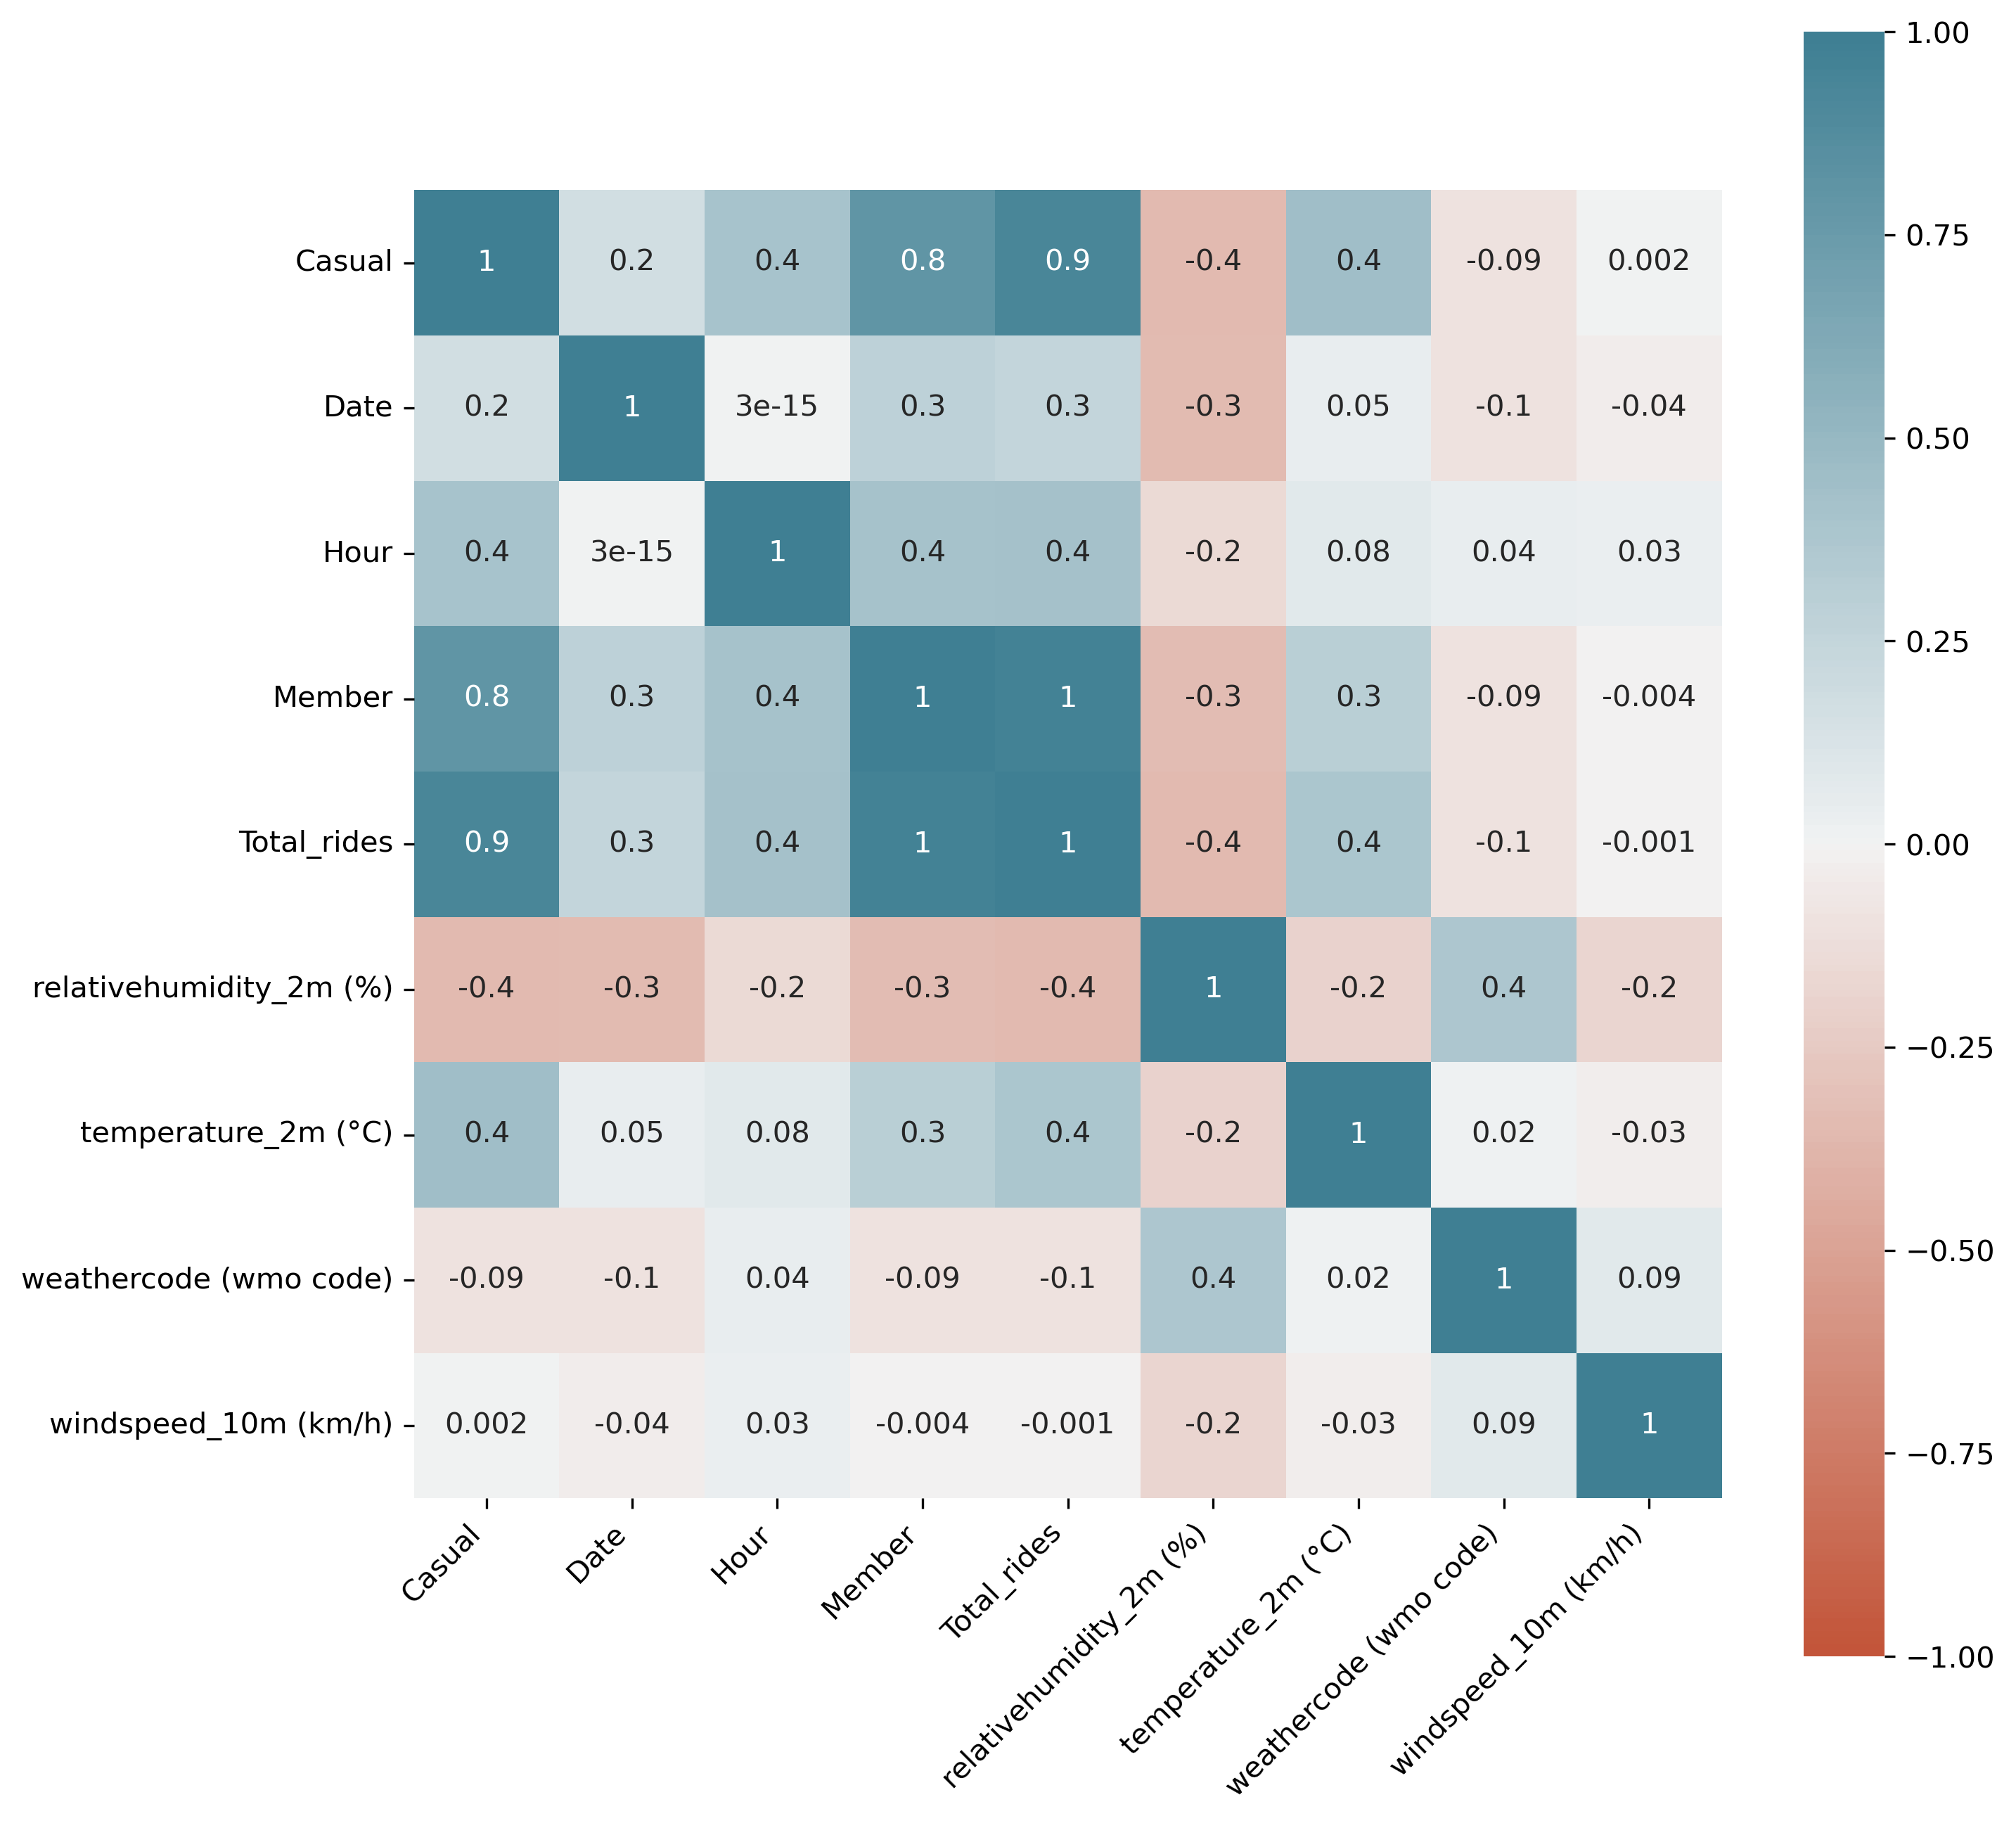

In [86]:
bike_data_hourly_corr = bike_data_hourly.drop(columns=['humidity_catogorised','temp_catogorised','weather_catagorised','wind_catagorised'])

corr = bike_data_hourly_corr.corr()

plt.figure(figsize=(10,10), dpi=300)

ax = sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True,
annot= True, fmt='.1g'
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)



<Axes: xlabel='humidity_catogorised', ylabel='Total_rides'>

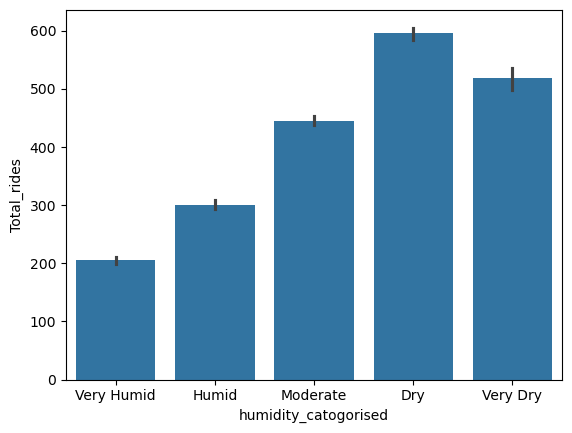

In [87]:
sns.barplot(data=bike_data_hourly, x='humidity_catogorised', y='Total_rides')

<Axes: xlabel='temp_catogorised', ylabel='Date'>

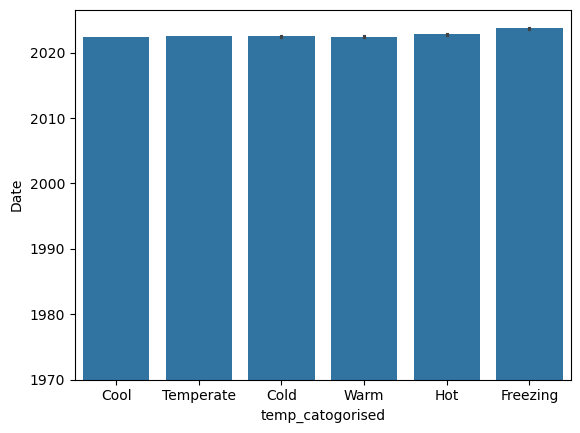

In [88]:
sns.barplot(data=bike_data_hourly, x='temp_catogorised', y='Date')

([0, 1, 2, 3],
 [Text(0, 0, 'Light to Moderate Breeze'),
  Text(1, 0, 'Calm'),
  Text(2, 0, 'Severe Gale to Hurricane'),
  Text(3, 0, 'Fresh to Strong Breeze')])

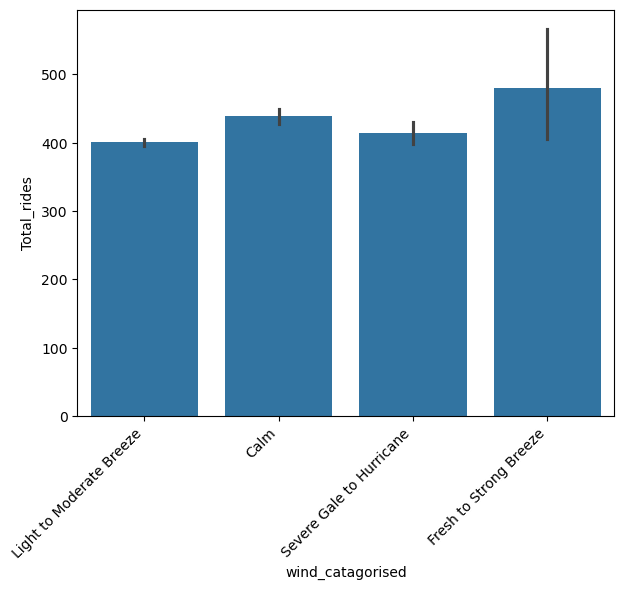

In [89]:
sns.barplot(data=bike_data_hourly, x='wind_catagorised', y='Total_rides')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')

In [90]:
bike_data_hourly['Hour'].max()

23

In [91]:
print(bike_data_hourly['temperature_2m (°C)'].min())

-14.6


In [92]:
bike_data_hourly['Hour'] = pd.to_datetime(bike_data_hourly['Hour'], format='%H')

In [93]:
bike_data_daily['Date'] = pd.to_datetime(bike_data_daily['Date'], format='%Y-%m-%d')

In [94]:
bike_data_hourly['day_time'] = bike_data_hourly['Hour'].dt.hour.apply(lambda value: ' early morning'
if value <= 6 else 'late morning'
if value <= 12 else 'afternoon'
if value <= 18 else 'night')

<Axes: xlabel='day_time', ylabel='Casual'>

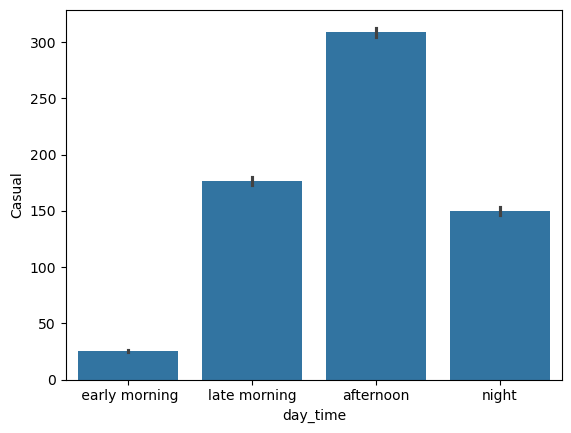

In [95]:
sns.barplot(data=bike_data_hourly, x='day_time', y='Casual')

<Axes: xlabel='day_time', ylabel='Total_rides'>

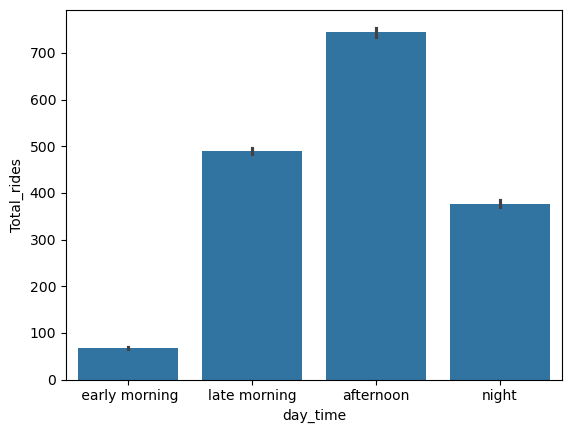

In [96]:
sns.barplot(data=bike_data_hourly, x='day_time', y='Total_rides')

<Axes: xlabel='day_time', ylabel='Total_rides'>

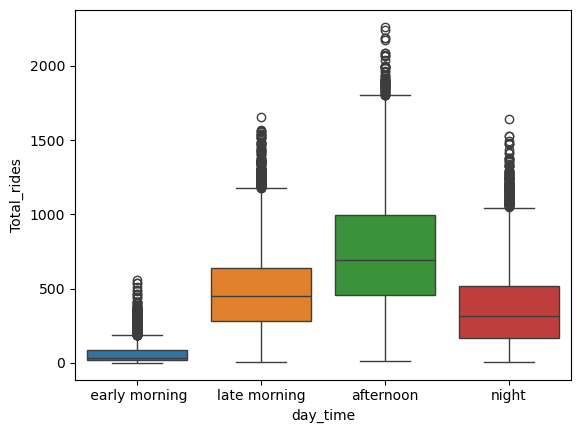

In [97]:
sns.boxplot(data=bike_data_hourly, hue='day_time', x='day_time', y='Total_rides')

In [98]:
bike_data_daily['weathercode (wmo code)'].unique()

array([63, 61,  3, 51,  2,  1,  0, 53, 73, 71, 75, 55, 65])

In [99]:
bike_data_daily['Date'] = pd.to_datetime(bike_data_daily['Date'])

In [100]:
def get_season(Date):
    month = Date.month
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'

bike_data_daily['season'] = bike_data_daily['Date'].apply(get_season)

In [101]:
import holidays

us_holidays = holidays.US()

bike_data_daily['holiday'] = bike_data_daily['Date'].apply(lambda value: value in us_holidays)

print(bike_data_daily[['Date', 'holiday']].head())

        Date  holiday
0 2021-01-01     True
1 2021-01-02    False
2 2021-01-03    False
3 2021-01-04    False
4 2021-01-05    False


In [102]:
weather = {
0:	'Clear sky',
1:	'Mainly clear',
2:	'Partly cloudy',
3:	'Overcast',
51:	'Light drizzle',
53:	'Moderate drizzle',
55:	'Dense drizzle',
61:	'Slight rain',
63:	'Moderate rain',
65:	'Heavy rain',
71:	'Slight snow fall',
73:	'Moderate snow fall',
75:	'Heavy snow fall'
}

bike_data_daily['weather'] = bike_data_daily['weathercode (wmo code)'].map(weather)

In [103]:
bike_data_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),season,holiday,weather
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,winter,True,Moderate rain
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,winter,False,Slight rain
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,winter,False,Moderate rain
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,winter,False,Overcast
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,winter,False,Light drizzle


In [104]:
def feel(temp):
    if temp >= 30:
        return 'Hot'
    elif 20 <= temp < 30:
        return 'Warm'
    elif 10 <= temp < 20:
        return 'Temperate'
    elif 0 <= temp < 10:
        return 'Cool'
    elif -10 <= temp < 0:
        return 'Cold'
    else:  # temp < -10
        return 'Freezing'

bike_data_daily['feels'] = bike_data_daily['apparent_temperature_mean (°C)'].apply(feel)

In [105]:
bike_data_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),season,holiday,weather,feels
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,winter,True,Moderate rain,Cold
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,winter,False,Slight rain,Cool
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,winter,False,Moderate rain,Cool
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,winter,False,Overcast,Cool
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,winter,False,Light drizzle,Cool


In [106]:
for value in bike_data_daily:
    bike_data_daily['percentage_of_members'] = round((bike_data_daily['Member'] / bike_data_daily['Total_rides']) * 100, 2)


In [107]:
def wind_feel(speed):
    if speed <= 5:
        return 'Calm'
    elif 6 <= speed <= 28:
        return 'Light to Moderate Breeze'
    elif 29 <= speed <= 61:
        return 'Fresh to Strong Breeze'
    elif 62 <= speed <= 88:
        return 'High Wind to Gale'
    else:  # speed > 88
        return 'Severe Gale to Hurricane'

bike_data_daily['wind_catagorised'] = bike_data_daily['windspeed_10m_max (km/h)'].apply(wind_feel)

In [108]:
bike_data_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),season,holiday,weather,feels,percentage_of_members,wind_catagorised
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,winter,True,Moderate rain,Cold,61.39,Light to Moderate Breeze
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,winter,False,Slight rain,Cool,49.74,Light to Moderate Breeze
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,winter,False,Moderate rain,Cool,69.59,Light to Moderate Breeze
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,winter,False,Overcast,Cool,69.57,Light to Moderate Breeze
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,winter,False,Light drizzle,Cool,65.47,Light to Moderate Breeze


In [109]:
def year(date):
    get_year = date.year

    if get_year == 2021:
        return '2021'
    elif get_year == 2022:
        return '2022'
    elif get_year == 2023:
        return '2023'

bike_data_daily['year'] = bike_data_daily['Date'].apply(year)

In [110]:
bike_data_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),season,holiday,weather,feels,percentage_of_members,wind_catagorised,year
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,winter,True,Moderate rain,Cold,61.39,Light to Moderate Breeze,2021
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,winter,False,Slight rain,Cool,49.74,Light to Moderate Breeze,2021
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,winter,False,Moderate rain,Cool,69.59,Light to Moderate Breeze,2021
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,winter,False,Overcast,Cool,69.57,Light to Moderate Breeze,2021
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,winter,False,Light drizzle,Cool,65.47,Light to Moderate Breeze,2021


<Axes: xlabel='season', ylabel='Total_rides'>

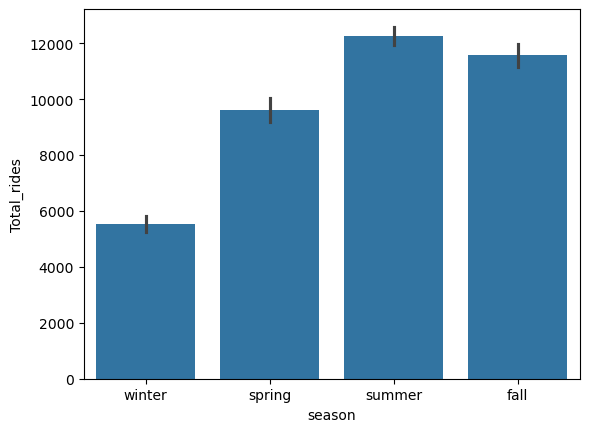

In [111]:
sns.barplot(data=bike_data_daily, x='season', y='Total_rides')

In [112]:
bike_data_daily['day_type'] = bike_data_daily['Date'].dt.weekday.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [113]:
bike_data_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),season,holiday,weather,feels,percentage_of_members,wind_catagorised,year,day_type
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,winter,True,Moderate rain,Cold,61.39,Light to Moderate Breeze,2021,Weekday
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,winter,False,Slight rain,Cool,49.74,Light to Moderate Breeze,2021,Weekend
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,winter,False,Moderate rain,Cool,69.59,Light to Moderate Breeze,2021,Weekend
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,winter,False,Overcast,Cool,69.57,Light to Moderate Breeze,2021,Weekday
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,winter,False,Light drizzle,Cool,65.47,Light to Moderate Breeze,2021,Weekday


/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_3307/3461688526.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=bike_data_daily, x='season', y='windspeed_10m_max (km/h)', hue='wind_catagorised',ci=None)


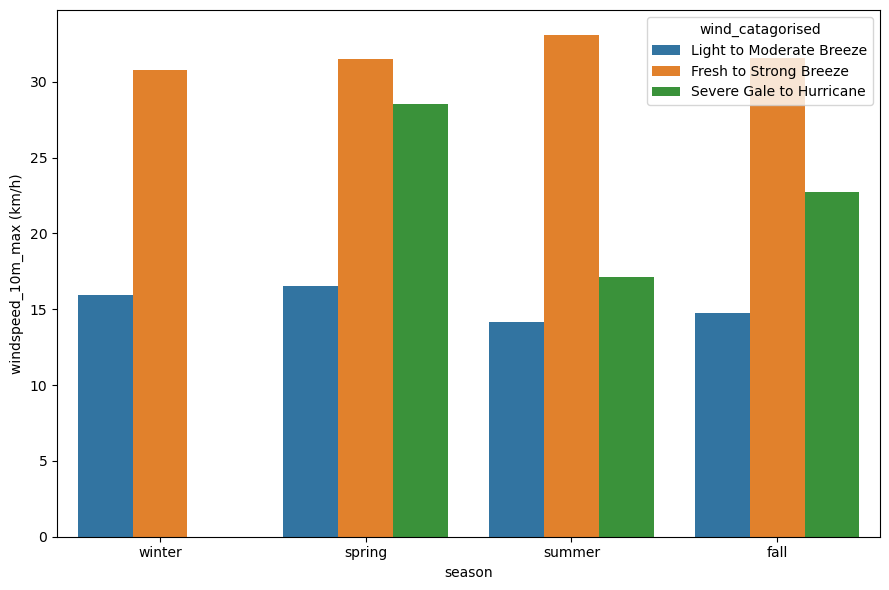

In [114]:
plt.figure(figsize=(9, 6))
sns.barplot(data=bike_data_daily, x='season', y='windspeed_10m_max (km/h)', hue='wind_catagorised',ci=None)
plt.tight_layout()

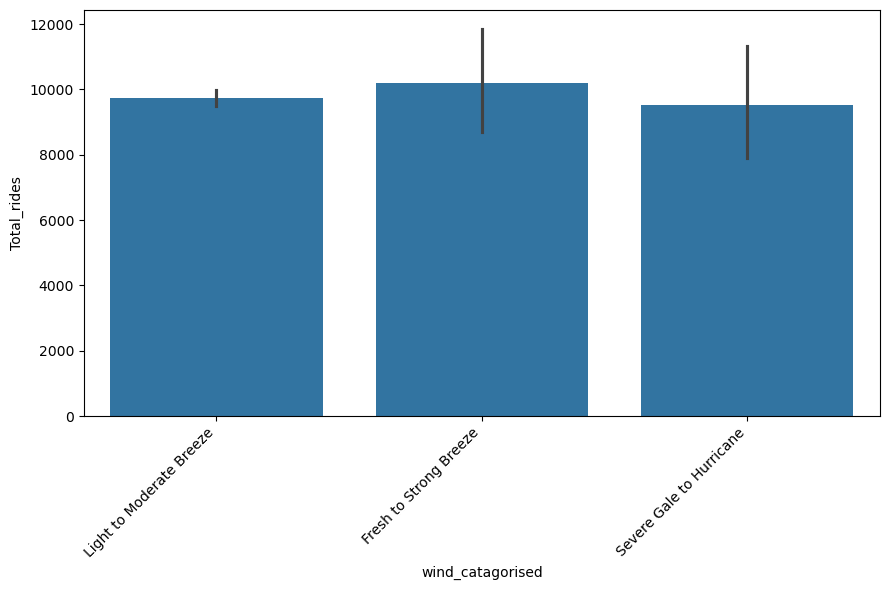

In [115]:
plt.figure(figsize=(9,6))
sns.barplot(data=bike_data_daily, x='wind_catagorised', y='Total_rides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<Axes: xlabel='holiday', ylabel='Total_rides'>

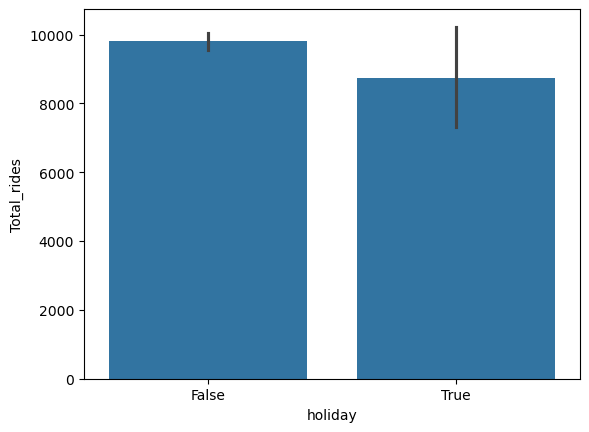

In [116]:
sns.barplot(data=bike_data_daily, x='holiday', y='Total_rides')

[Text(0.5, 0, 'Casual'),
 Text(1.5, 0, 'Date'),
 Text(2.5, 0, 'Member'),
 Text(3.5, 0, 'Total_rides'),
 Text(4.5, 0, 'apparent_temperature_mean (°C)'),
 Text(5.5, 0, 'temperature_2m_mean (°C)'),
 Text(6.5, 0, 'windspeed_10m_max (km/h)'),
 Text(7.5, 0, 'percentage_of_members'),
 Text(8.5, 0, 'year')]

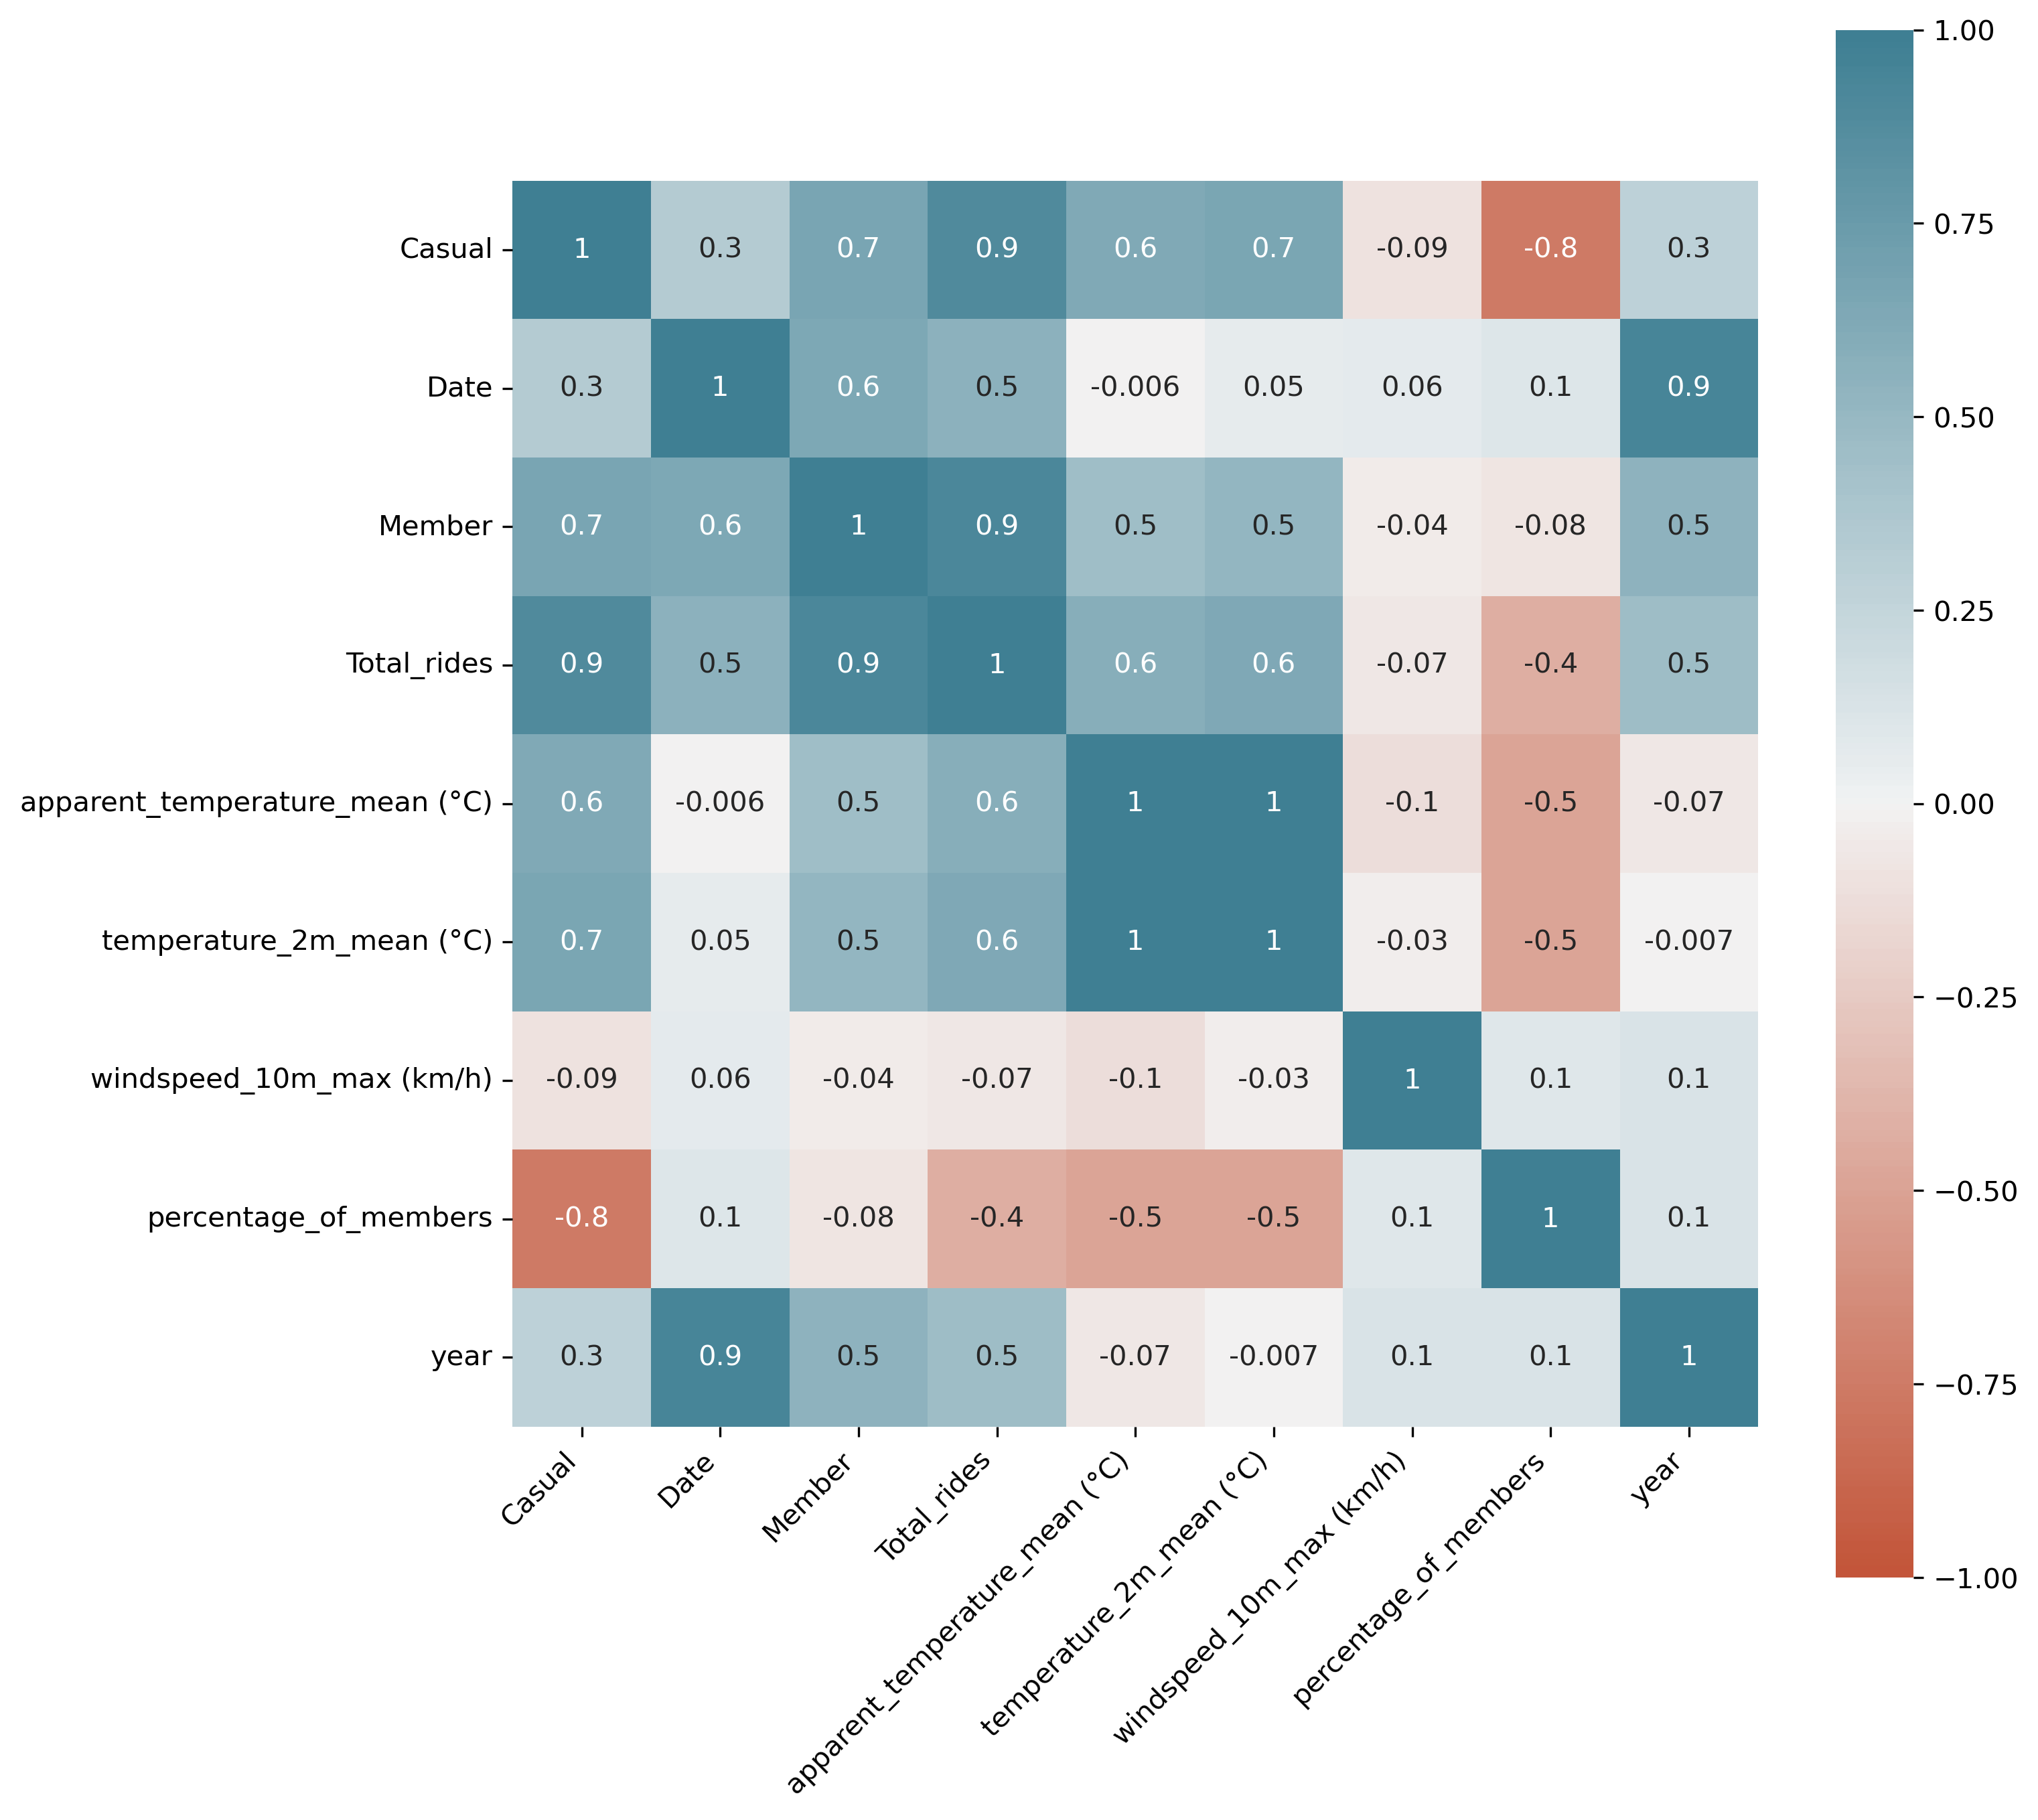

In [117]:
bike_data_daily_corr = bike_data_daily.drop(columns=['season',	'holiday',	'weather',	'feels', 'wind_catagorised', 'day_type', 'weathercode (wmo code)'])
corr = bike_data_daily_corr.corr()

plt.figure(figsize=(10,10), dpi=300)

ax = sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True,
annot= True, fmt='.1g'
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [118]:
bike_data_daily_corr['month'] = bike_data_daily_corr['Date'].dt.month

<Axes: xlabel='temperature_2m_mean (°C)', ylabel='Total_rides'>

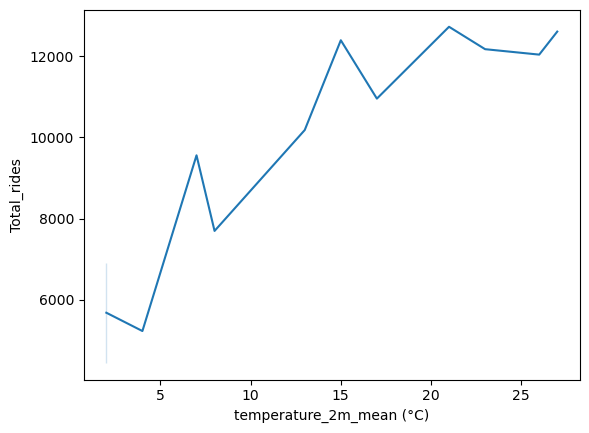

In [119]:

bike_data_daily_corr['year'] = bike_data_daily_corr['year'].astype(int)

bike_data_daily_corr.dropna(inplace=True)

data_grouped = bike_data_daily_corr.groupby('month').mean().reset_index()

data_grouped['temperature_2m_mean (°C)'] = data_grouped['temperature_2m_mean (°C)'].astype(int)

sns.lineplot(data=data_grouped, x='temperature_2m_mean (°C)', y='Total_rides')


In [120]:
data_grouped.dtypes

month                                      int32
Casual                                   float64
Date                              datetime64[ns]
Member                                   float64
Total_rides                              float64
apparent_temperature_mean (°C)           float64
temperature_2m_mean (°C)                   int64
windspeed_10m_max (km/h)                 float64
percentage_of_members                    float64
year                                     float64
dtype: object

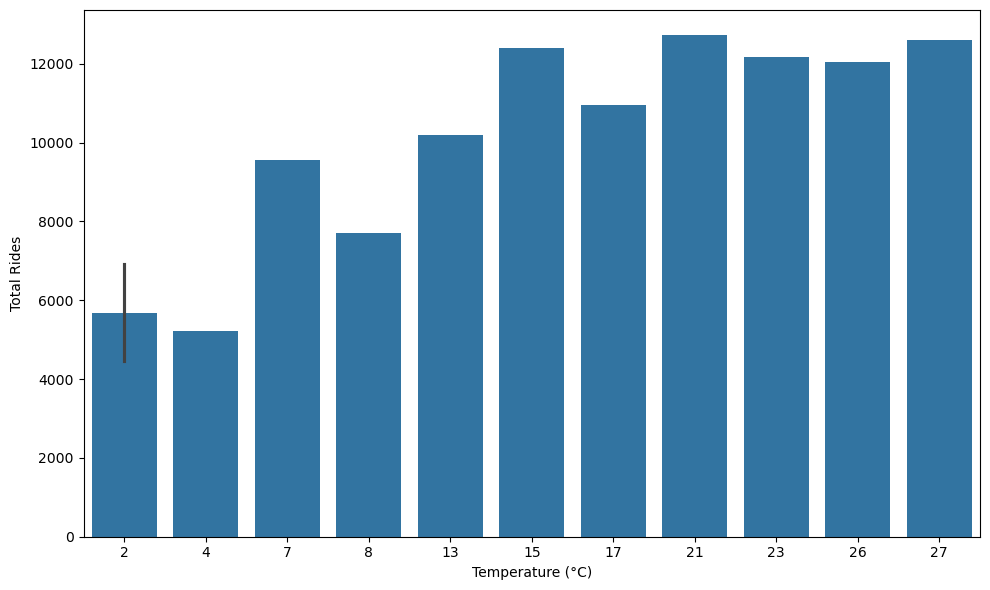

In [121]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_grouped, x='temperature_2m_mean (°C)', y='Total_rides')

plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rides')
plt.tight_layout()
plt.show()

In [122]:
bike_data_daily_corr.dtypes

Casual                                     int64
Date                              datetime64[ns]
Member                                     int64
Total_rides                                int64
apparent_temperature_mean (°C)           float64
temperature_2m_mean (°C)                 float64
windspeed_10m_max (km/h)                 float64
percentage_of_members                    float64
year                                       int64
month                                      int32
dtype: object

<Axes: xlabel='year', ylabel='percentage_of_members'>

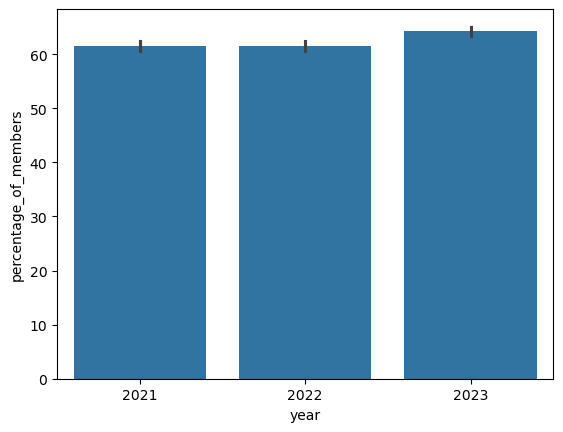

In [123]:
sns.barplot(data=bike_data_daily, x='year', y='percentage_of_members')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Moderate rain'),
  Text(1, 0, 'Slight rain'),
  Text(2, 0, 'Overcast'),
  Text(3, 0, 'Light drizzle'),
  Text(4, 0, 'Partly cloudy'),
  Text(5, 0, 'Mainly clear'),
  Text(6, 0, 'Clear sky'),
  Text(7, 0, 'Moderate drizzle'),
  Text(8, 0, 'Moderate snow fall'),
  Text(9, 0, 'Slight snow fall'),
  Text(10, 0, 'Heavy snow fall'),
  Text(11, 0, 'Dense drizzle'),
  Text(12, 0, 'Heavy rain')])

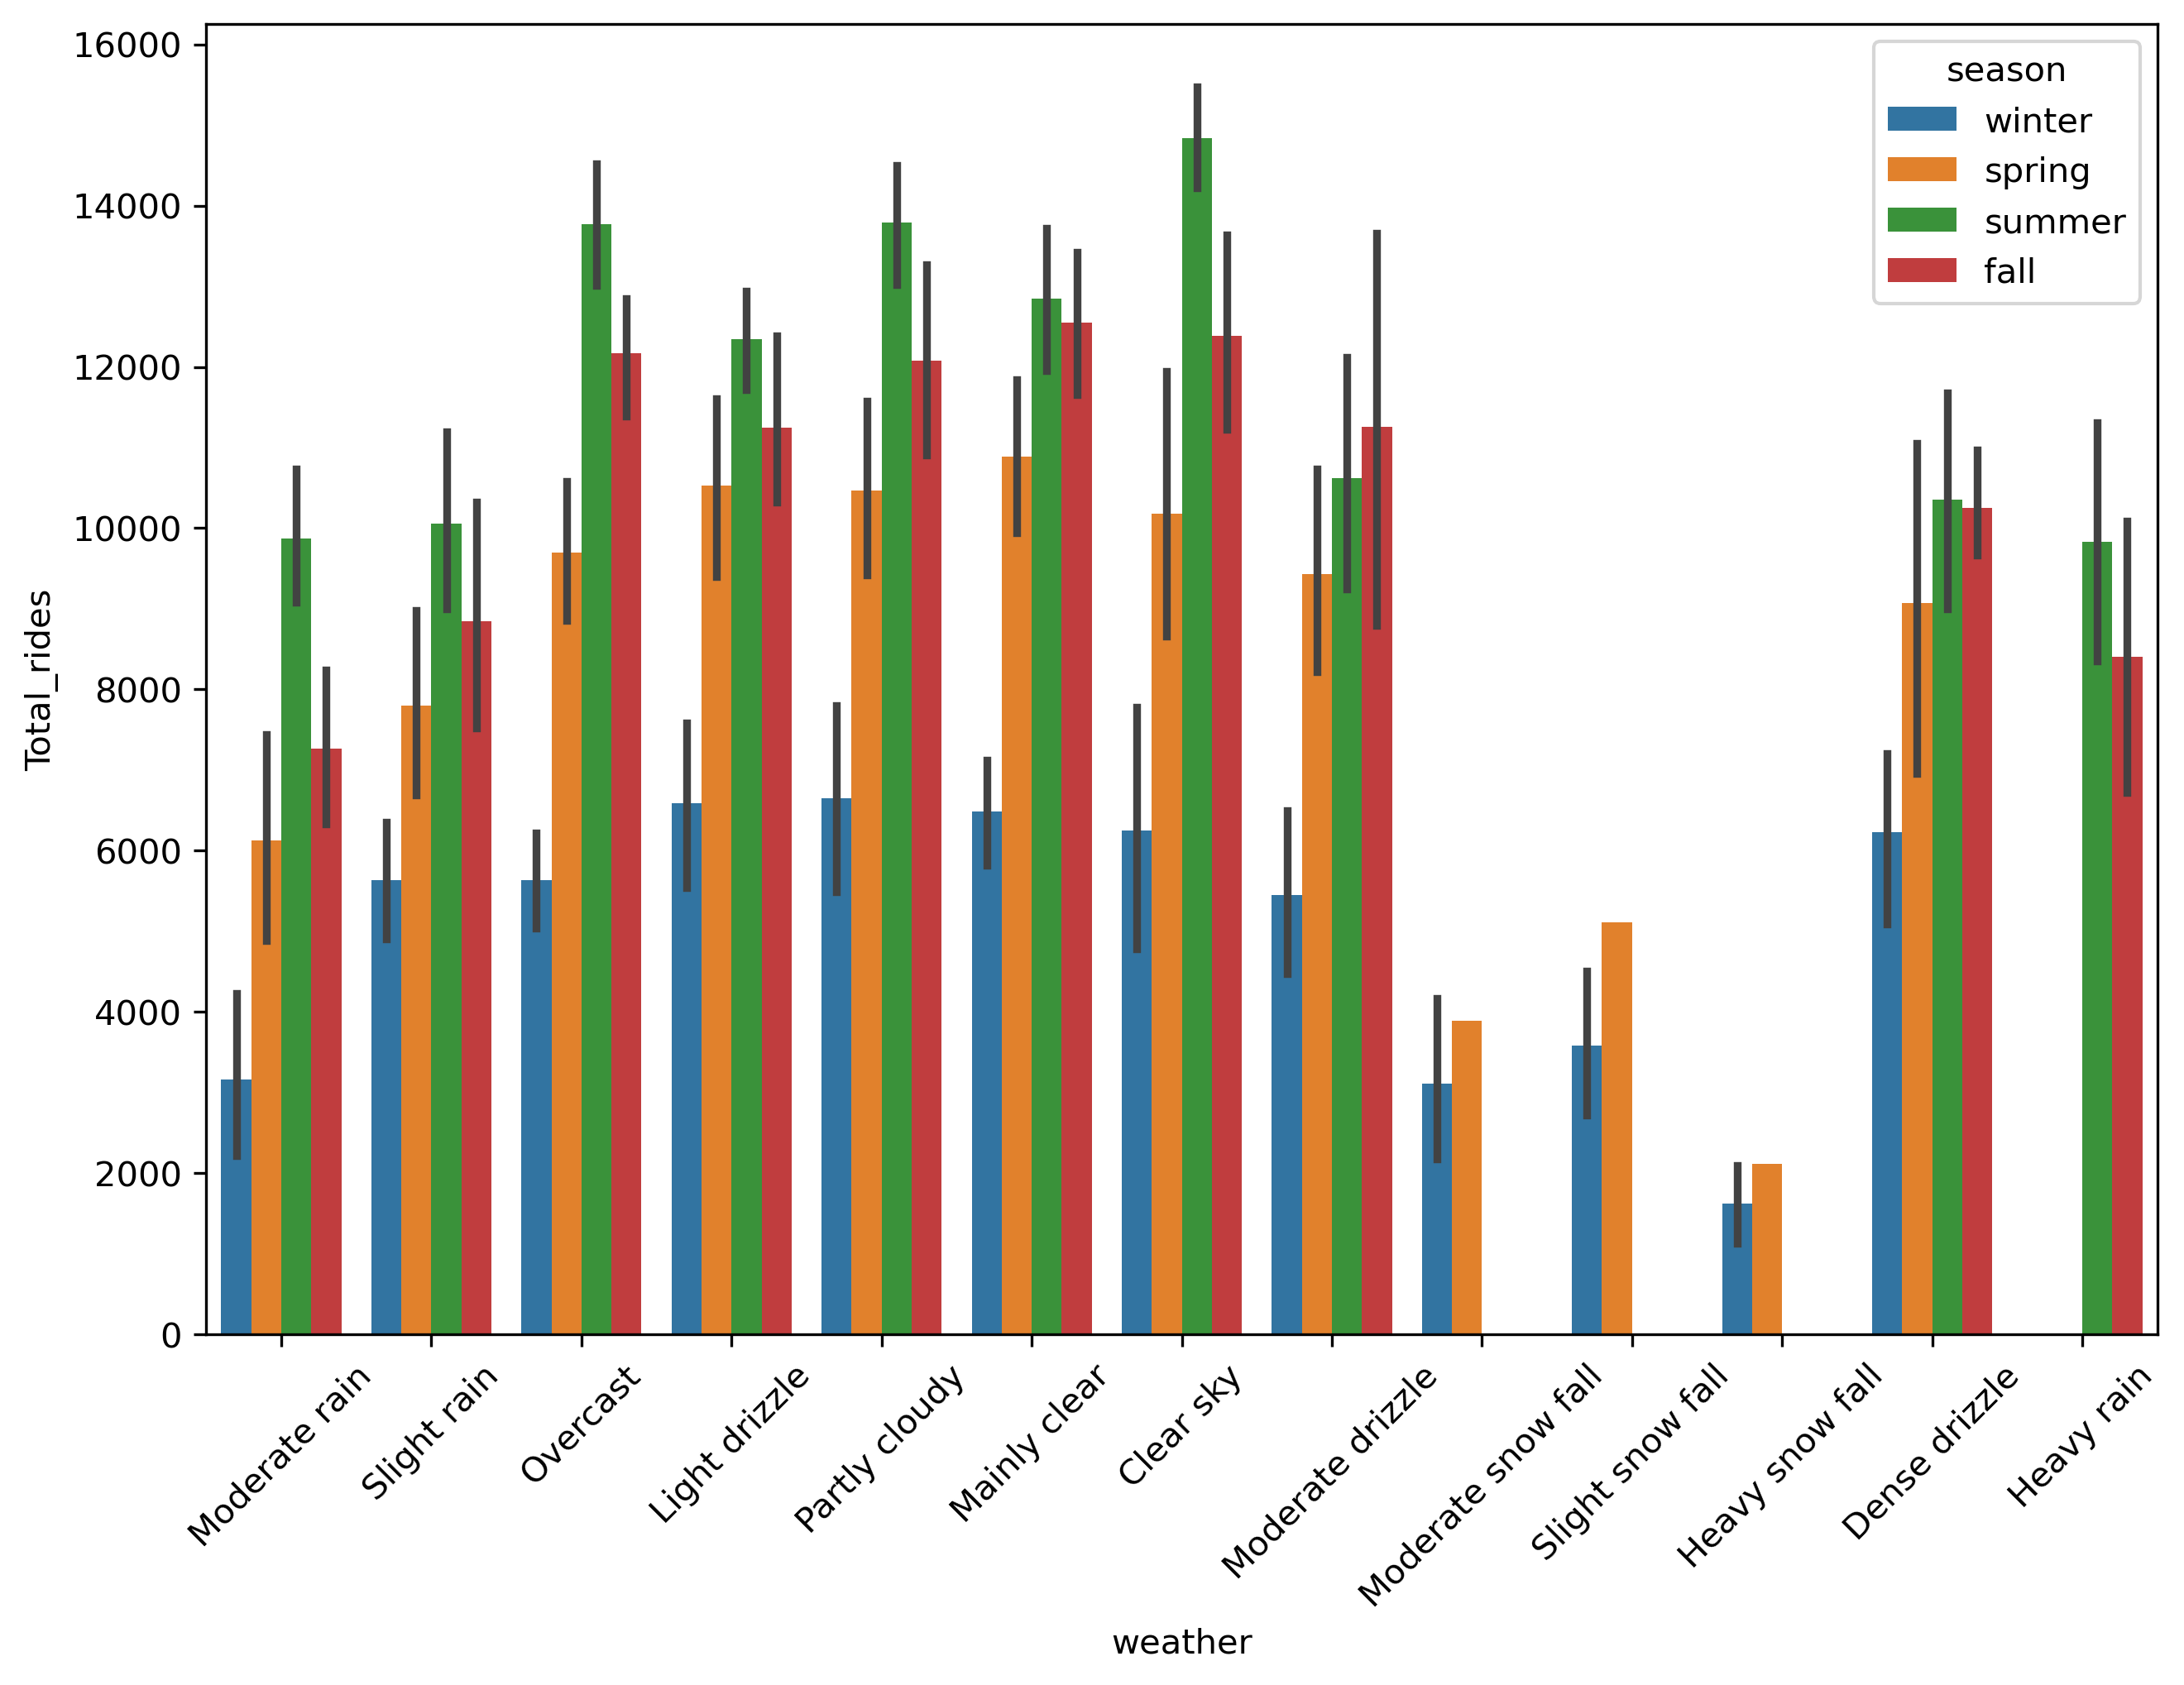

In [124]:
plt.figure(figsize=(9,6),dpi=300)
sns.barplot(data=bike_data_daily, x='weather', y='Total_rides',hue='season')
plt.tight_layout()
plt.xticks(rotation=45)

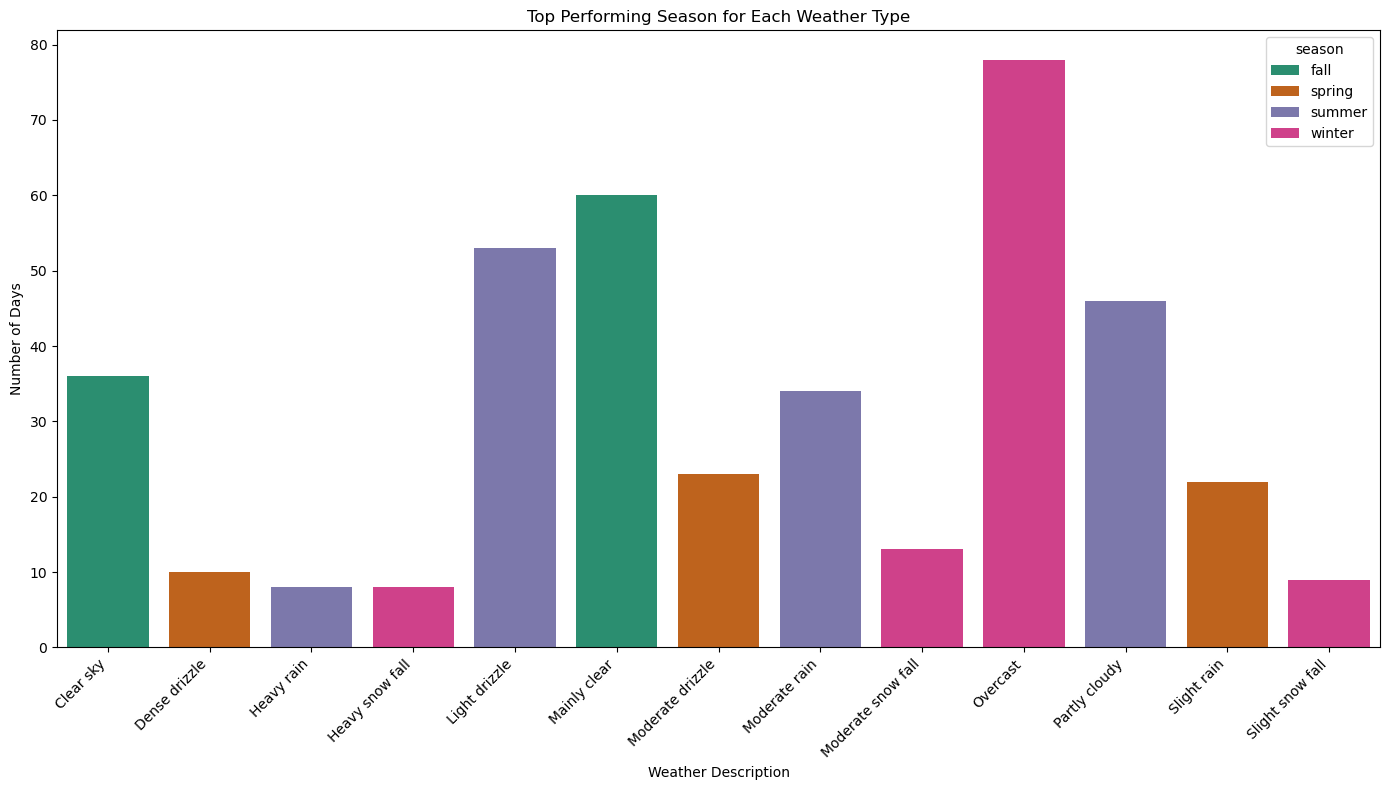

In [125]:
# Group by 'weather_description' and 'season', and count the occurrences
weather_season_counts = bike_data_daily.groupby(['weather', 'season']).size().reset_index(name='counts')

# Initialize an empty list to store the data for plotting
top_weather_season_data = []

# Loop over each unique weather description
for weather in weather_season_counts['weather'].unique():
    # Filter the data to get rows for the specific weather type
    weather_data = weather_season_counts[weather_season_counts['weather'] == weather]
    
    # Find the top performing season for the current weather type
    top_season_for_weather = weather_data.loc[weather_data['counts'].idxmax()]
    
    # Append the data of the top season for this weather type to the list
    top_weather_season_data.append(top_season_for_weather)

# Convert the list into a DataFrame for plotting
top_weather_season_df = pd.DataFrame(top_weather_season_data)

# Create the bar plot for top performing seasons of each weather type
plt.figure(figsize=(14, 8))
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
sns.barplot(data=top_weather_season_df, x='weather', y='counts', hue='season', palette='Dark2')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.title('Top Performing Season for Each Weather Type')
plt.xlabel('Weather Description')
plt.ylabel('Number of Days')
plt.tight_layout()
plt.show()





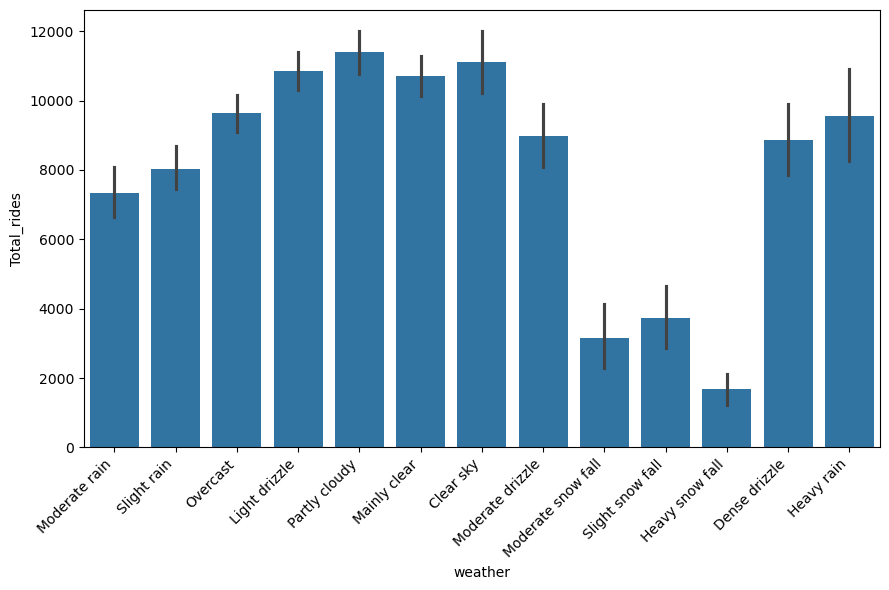

In [126]:
plt.figure(figsize=(9,6))
sns.barplot(data=bike_data_daily, x='weather', y='Total_rides' )
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<Axes: xlabel='season', ylabel='percentage_of_members'>

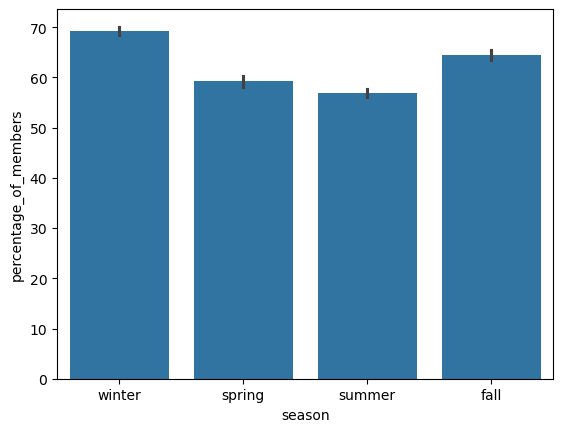

In [127]:
sns.barplot(data=bike_data_daily, x='season', y='percentage_of_members')

<Axes: xlabel='feels', ylabel='Total_rides'>

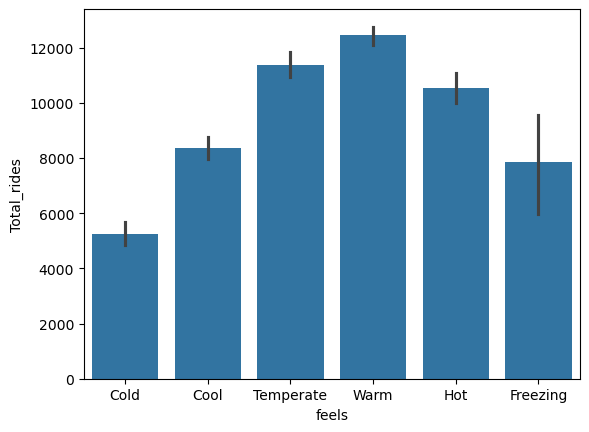

In [128]:
sns.barplot(data=bike_data_daily, x='feels', y='Total_rides')

In [129]:
bike_data_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),season,holiday,weather,feels,percentage_of_members,wind_catagorised,year,day_type
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,winter,True,Moderate rain,Cold,61.39,Light to Moderate Breeze,2021,Weekday
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,winter,False,Slight rain,Cool,49.74,Light to Moderate Breeze,2021,Weekend
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,winter,False,Moderate rain,Cool,69.59,Light to Moderate Breeze,2021,Weekend
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,winter,False,Overcast,Cool,69.57,Light to Moderate Breeze,2021,Weekday
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,winter,False,Light drizzle,Cool,65.47,Light to Moderate Breeze,2021,Weekday


<Axes: xlabel='day_type', ylabel='Member'>

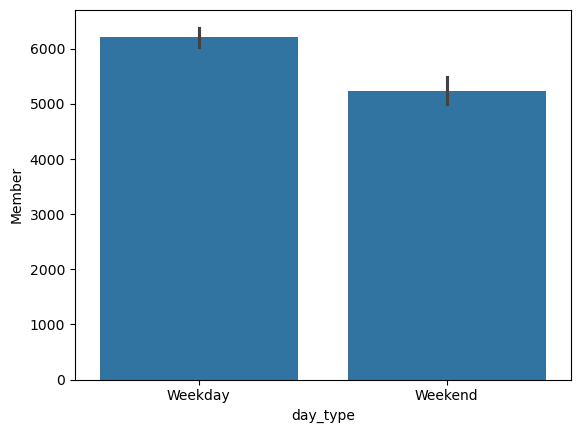

In [130]:
sns.barplot(data=bike_data_daily, x='day_type', y='Member')

<Axes: xlabel='day_type', ylabel='Casual'>

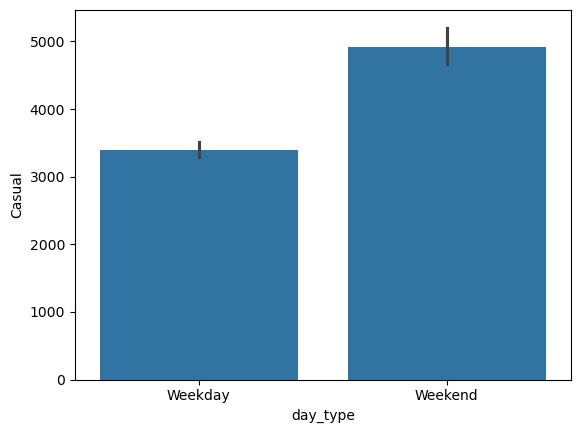

In [131]:
sns.barplot(data=bike_data_daily, x='day_type', y='Casual')

In [132]:
full_data = pd.read_csv('/Users/enzowurtele/Desktop/dataBases/CBS_2021-2023_Full.csv')

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_3307/4054110523.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv('/Users/enzowurtele/Desktop/dataBases/CBS_2021-2023_Full.csv')


In [133]:
full_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [134]:
full_data.index.max()

10693996

In [182]:
full_data['started_at'] = pd.to_datetime(full_data['started_at'])

full_data['ended_at'] = pd.to_datetime(full_data['ended_at'])

full_data['ride_duration'] = full_data['ended_at'] - full_data['started_at']

In [174]:
full_data['time_of_day'] = full_data['ended_at'].dt.hour.apply(lambda value : 'early morning'
if value <= 6 else 'late morning'
if value <= 12 else 'afternoon'
if value <= 18 else 'night')

In [175]:
full_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,time_of_day
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,0 days 00:25:20,early morning
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual,0 days 00:15:51,early morning
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,0 days 00:14:13,early morning
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,0 days 00:05:35,early morning
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,0 days 00:03:14,early morning


In [163]:
full_data.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
ride_duration         timedelta64[ns]
time_of_day                    object
dtype: object

In [177]:
ride_length = full_data['ride_duration'].mean()

In [181]:
early_morning_rides = full_data[full_data['time_of_day'] == 'early morning']

mean_early_morning_duration = early_morning_rides['ride_duration'].mean()

print(mean_early_morning_duration)

0 days 00:29:20.116213737


In [184]:
late_morning_rides = full_data[full_data['time_of_day'] == 'late morning']

mean_late_morning_duration = late_morning_rides['ride_duration'].mean()

print(mean_late_morning_duration)

0 days 00:20:51.325398614


In [186]:
afternoon_rides = full_data[full_data['time_of_day'] == 'afternoon']

mean_afternoon_duration = afternoon_rides['ride_duration'].mean()

print(mean_afternoon_duration)

0 days 00:23:30.122206657


In [187]:
# Filter for 'night' rides
night_rides = full_data[full_data['time_of_day'] == 'night']

# Calculate the mean ride duration for night rides
mean_night_duration = night_rides['ride_duration'].mean()

# Print the result
print(mean_night_duration)


0 days 00:22:54.984420153


In [188]:
print(ride_length)

0 days 00:22:54.468217917
